In [2]:
import pandas as pd
import folium
from shapely.geometry import Point, LineString, Polygon, box
import numpy as np
import json
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.graph_objs as go 
import bokeh

In [25]:
cap = pd.read_csv('cap.csv')  
#cap
listt = []
for i in range(len(cap)):
    listt.append([cap.iloc[i]['Latitude'], cap.iloc[i]['Longitude']])


mapp = folium.Map(location = [43.001525,41.023415], zoom_start=6)
for c in listt:
    mapp.add_child(folium.Marker(location=c,popup='Site is here',
                                icon = folium.Icon(color='blue')))
mapp
mapp.save('Assignment5_Map.html')

In [28]:
rabat = [33.9716,6.8498]
cape = [-33.9249,18.4241]
moga = [2.0469,45.3182]

points = []
points.append(rabat)
points.append(cape)
points.append(moga)

mapp = folium.Map(location = rabat, zoom_start=6)
for c in points:
    mapp.add_child(folium.Marker(location=c,popup='Site is here',
                                icon = folium.Icon(color='blue')))

mapp


In [31]:
pt1 = Point(33.9716,6.8498)
print(Point(rabat).distance(Point(cape)))
poly=Polygon([(33.9716,6.8498),(-33.9249,18.4241),(2.0469,45.3182)])
print('Area:', poly.area)
print('Perimeter:', poly.length)
print(poly.geom_type)


68.87596919637501
Area: 1121.181832695
Perimeter: 163.77996206508018
Polygon


In [14]:
d = json.dumps({"type":"FeatureCollection","features":[
{"type":"Feature","id":"DE","properties":{"name":"Delaware"},"geometry":{"type":"Polygon","coordinates":[[[-75.414089,39.804456],[-75.507197,39.683964],[-75.611259,39.61824],[-75.589352,39.459409],[-75.441474,39.311532],[-75.403136,39.065069],[-75.189535,38.807653],[-75.09095,38.796699],[-75.047134,38.451652],[-75.693413,38.462606],[-75.786521,39.722302],[-75.616736,39.831841],[-75.414089,39.804456]]]}}
{"type":"Feature","id":"CO","properties":{"name":"Colorado"},"geometry":{"type":"Polygon","coordinates":[[[-107.919731,41.003906],[-105.728954,40.998429],[-104.053011,41.003906],[-102.053927,41.003906],[-102.053927,40.001626],[-102.042974,36.994786],[-103.001438,37.000263],[-104.337812,36.994786],[-106.868158,36.994786],[-107.421329,37.000263],[-109.042503,37.000263],[-109.042503,38.166851],[-109.058934,38.27639],[-109.053457,39.125316],[-109.04798,40.998429],[-107.919731,41.003906]]]}}
]})

SyntaxError: invalid syntax (<ipython-input-14-c9df0c8e3efd>, line 3)

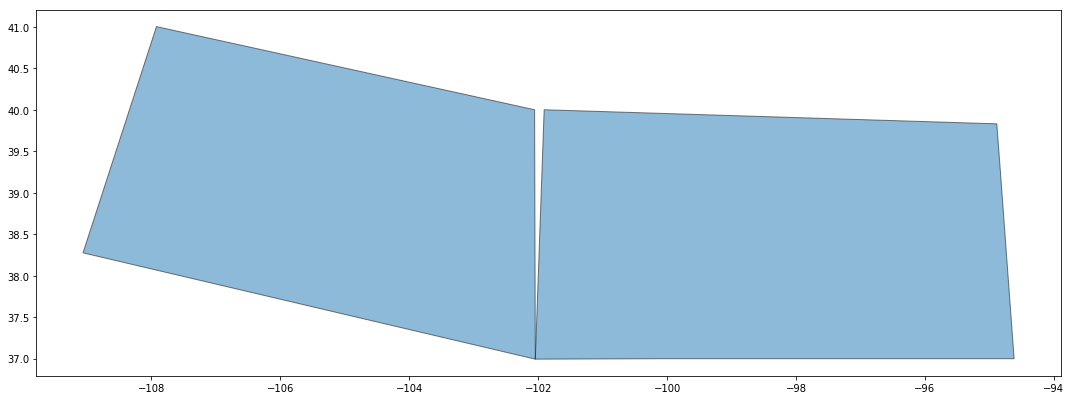

In [45]:

    
data = {"type":"FeatureCollection","features":[
{"type":"Feature","id":"CO","properties":{"name":"Colorado"},"geometry":{"type":"Polygon","coordinates":[[[-107.919731,41.003906],[-102.053927,40.001626],[-102.042974,36.994786],[-109.058934,38.27639]]]}},
{"type":"Feature","id":"KS","properties":{"name":"Kansas"},"geometry":{"type":"Polygon","coordinates":[[[-94.884612,39.831841],[-94.824366,39.20747],[-94.616242,37.000263],[-100.087706,37.000263],[-102.042974,36.994786],[-101.90605,40.001626]]]}}]}

with open('geo.json', 'w') as fp:
    json.dump(data, fp)


with open('geo.json') as f:
    data = json.loads(f.read())

df1 = gpd.read_file('geo.json')
ax=df1.plot(figsize = (15,9), alpha = 0.5, edgecolor = 'k')
plt.tight_layout()
plt.show()
 

In [59]:
import random

plott = pd.read_csv('state.csv')
mylist = []

for i in range(0,48):
    x = random.uniform(1,10)
    mylist.append(x)
df = pd.DataFrame(plott)
df['Happiness'] = mylist
df 

Unnamed: 0 state  fips  Happiness
0            0    AL     1   4.820088
1            1    AR     5   6.336578
2            2    AZ     4   4.286360
3            3    CA     6   2.877037
4            4    CO     8   8.691551
5            5    CT     9   9.997109
6            6    DE    10   9.833650
7            7    FL    12   3.567206
8            8    GA    13   5.596151
9            9    IA    19   9.895464
10          10    ID    16   2.987184
11          11    IL    17   8.918169
12          12    IN    18   8.649502
13          13    KS    20   3.270408
14          14    KY    21   7.351668
15          15    LA    22   5.030258
16          16    MA    25   2.489818
17          17    MD    24   2.312147
18          18    ME    23   6.217324
19          19    MI    26   3.653169
20          20    MN    27   1.968327
21          21    MO    29   4.629377
22          22    MS    28   1.820180
23          23    MT    30   4.050472
24          24    NC    37   7.879591
25          25    ND    38   4.031878
26          26    NE    31   7.260051
27          27    NH    33   6.063436
28          28    NJ    34   8.380289
29          29    NM    35   8.015334
30          30    NV    32   9.041449
31          31    NY    36   3.631131
32          32    OH    39   8.066037
33          33    OK    40   9.061660
34          34    OR    41   6.842297
35          35    PA    42   2.741332
36          36    RI    44   2.127820
37          37    SC    45   9.245362
38          38    SD    46   2.660354
39          39    TN    47   8.403620
40          40    TX    48   4.993296
41          41    UT    49   5.850723
42          42    VA    51   5.114597
43          43    VT    50   8.853875
44          44    WA    53   4.304959
45          45    WI    55   6.809354
46          46    WV    54   6.672574
47          47    WY    56   7.280501

In [67]:
data = dict(type='choropleth',
            locations=plott['state'],
            locationmode='USA-states',
            text=plott['state'],
            z=plott['Happiness'],
            ) 

layout = dict(geo = dict(scope='usa',
                         showlakes= False)
             )

choro = go.Figure(data=[data], layout=layout)
choro
choro.update_layout(
    title="Happiness Index by State",
    legend_title="Happeniess Index Score",
    font=dict(size=28))


choro.show()


In [16]:
from bokeh.plotting import figure, show, output_file
from bokeh.resources import INLINE
from bokeh.io import show, output_notebook
#from bokeh.charts import Histogram, show, output_notebook
output_notebook(INLINE)
output_file('histo.html')
np.random.seed(21)
x = np.random.exponential((2), size = 500)
xx, edges = np.histogram(x,bins=20)
df = pd.DataFrame(x)
p = figure()
p.quad(top=xx, bottom = 0, left= edges[:-1], right = edges[1:])
show(p)


Loading BokehJS ...